# 🍃 Date Fruit Classification using YOLOv8 (Instance Segmentation)

Welcome to the **Date Fruit Classification Project** powered by YOLOv8 and Roboflow.

This notebook demonstrates how to train a **YOLOv8 instance segmentation model** to classify and segment the following Saudi date varieties:

---

## 🏷️ Class Labels
| Class ID | Class Name |
|----------|------------|
| 0        | Ajwa       |
| 1        | Medjool    |
| 2        | Sokari     |
| 3        | Sugaey     |


---

## 📁 Dataset Structure

#nc: 4
#names: ['Ajwa', 'Medjool', 'Sokari', 'Sugaey']

In [1]:
# Install Ultralytics

!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.2 MB/s eta 0:00:00


In [22]:
# Import libraries
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import glob
import os
import cv2

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Current device: {device}")

Current device: cuda


In [7]:
# Load the data yml path
path = '/content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8'
dataset_yml_path = path + '/data.yaml'

print(dataset_yml_path)

/content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8/data.yaml


In [8]:
# Read the yaml content
%cat {dataset_yml_path}

train: /content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8/train/images
val: /content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8/valid/images
test: /content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8/test/images

nc: 4
names: ['Ajwa', 'Medjool', 'Sokari', 'Sugaey']

roboflow:
  workspace: abdulrahman-w5fdr
  project: date-fruit-classification-seg
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/abdulrahman-w5fdr/date-fruit-classification-seg/dataset/4

In [6]:
# Load the model YOLOv8
model = YOLO('yolov8x-seg.pt')

# LETS GO TO TRAIN MODEL :D

In [ ]:
model.train(data=dataset_yml_path, imgsz=1024, workers=8, batch=16, epochs=100, patience=20, device=0, cache=True, amp=True)

## **Evaluating the Model**
We use **mAP@0.5:0.95** to assess performance.

In [3]:
# Load the best.pth model!
model = YOLO('/content/drive/MyDrive/Date-fruit-segmentation/best.pt')

In [10]:
metrics = model.val(data=dataset_yml_path)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8/valid/labels.cache... 215 images, 0 backgrounds, 0 corrupt: 100%|██████████| 215/215 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:36<00:00,  2.60s/it]


                   all        215        215       0.97          1      0.995      0.984       0.97          1      0.995       0.99
                  Ajwa         15         15      0.961          1      0.995      0.976      0.961          1      0.995      0.982
               Medjool         15         15      0.989          1      0.995      0.978      0.989          1      0.995      0.995
                Sokari         15         15       0.97          1      0.995      0.995       0.97          1      0.995      0.987
                Sugaey        170        170      0.961          1      0.994      0.987      0.961          1      0.994      0.994
Speed: 1.8ms preprocess, 130.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val2


In [9]:
model.val(data=dataset_yml_path, split='test', device=0)

Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-seg summary (fused): 125 layers, 71,724,508 parameters, 0 gradients, 343.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 44.0MB/s]
val: Scanning /content/drive/MyDrive/Date-fruit-segmentation/date-fruit-classification-seg.v4i.yolov8/test/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:19<00:00,  2.74s/it]


                   all        104        104      0.999          1      0.995      0.995      0.999          1      0.995      0.994
                Sugaey        104        104      0.999          1      0.995      0.995      0.999          1      0.995      0.994
Speed: 3.6ms preprocess, 119.3ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/segment/val


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab621f3e8d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# Run prediction on your folder
model.predict(
    source="/content/real",                  #  Folder with images
    save=True,                                # Save annotated images
    save_txt=True,                            # Save predicted labels
    save_conf=True,                           # 🔢Save confidence scores
    imgsz=1024                                 # Resize same as training size
)


image 1/8 /content/real/Ajwa-2.png: 704x1024 1 Ajwa, 1 Medjool, 186.6ms
image 2/8 /content/real/Ajwa_1.jpg: 1024x1024 1 Ajwa, 3 Sugaeys, 197.2ms
image 3/8 /content/real/Medjol_1.jpg: 704x1024 1 Medjool, 117.8ms
image 4/8 /content/real/Medjol_2.jpg: 704x1024 1 Medjool, 115.4ms
image 5/8 /content/real/Sokari-1.jpg: 704x1024 1 Sokari, 118.0ms
image 6/8 /content/real/Sokari-2.jpg: 704x1024 1 Sokari, 118.9ms
image 7/8 /content/real/Sugaey-1.jpg: 704x1024 1 Sugaey, 116.8ms
image 8/8 /content/real/Sugaey-2.jpg: 704x1024 1 Sugaey, 116.8ms
Speed: 6.1ms preprocess, 135.9ms inference, 2.3ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/segment/predict
16 labels saved to runs/segment/predict/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Ajwa', 1: 'Medjool', 2: 'Sokari', 3: 'Sugaey'}
 obb: None
 orig_img: array([[[207, 206, 210],
         [207, 206, 210],
         [207, 206, 210],
         ...,
         [194, 197, 208],
         [194, 197, 208],
         [194, 197, 208]],
 
        [[207, 206, 210],
         [207, 206, 210],
         [207, 206, 210],
         ...,
         [194, 197, 208],
         [194, 197, 208],
         [194, 197, 208]],
 
        [[207, 206, 210],
         [207, 206, 210],
         [207, 206, 210],
         ...,
         [194, 197, 208],
         [194, 197, 208],
         [194, 197, 208]],
 
        ...,
 
        [[214, 209, 210],
         [215, 210, 211],
         [216, 211, 212],
         ...,
         [214, 209, 210],
         [214, 209, 210],
         [214, 209, 210]],
 
        [[214, 209, 210],
         [2

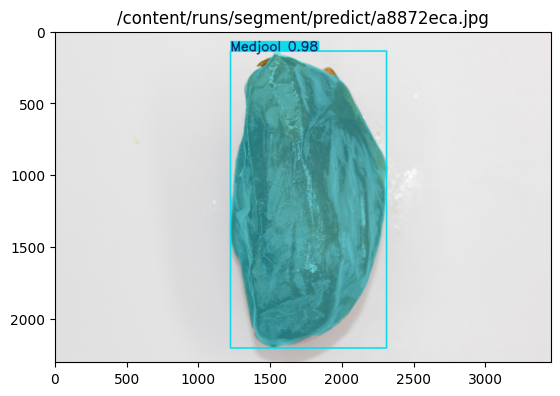

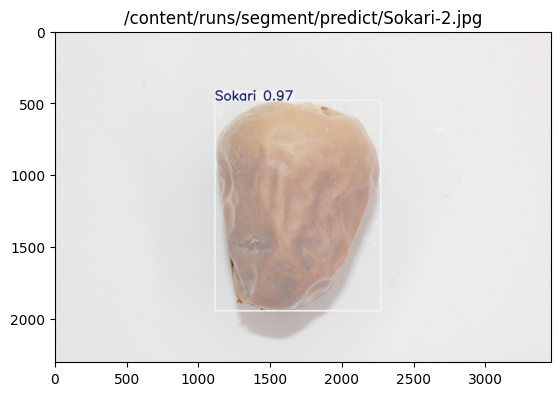

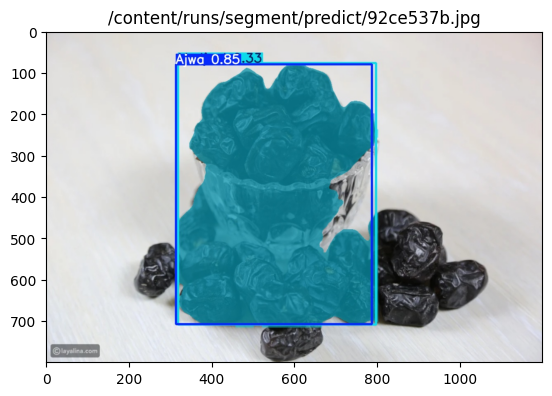

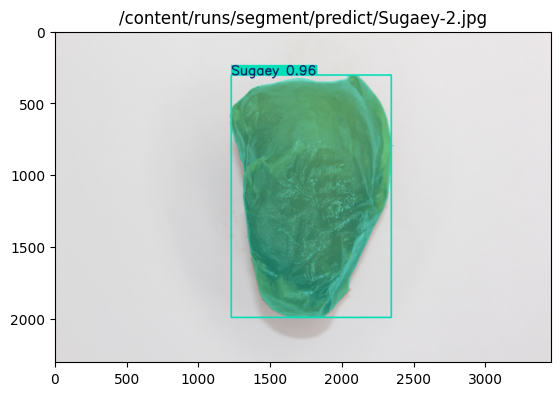

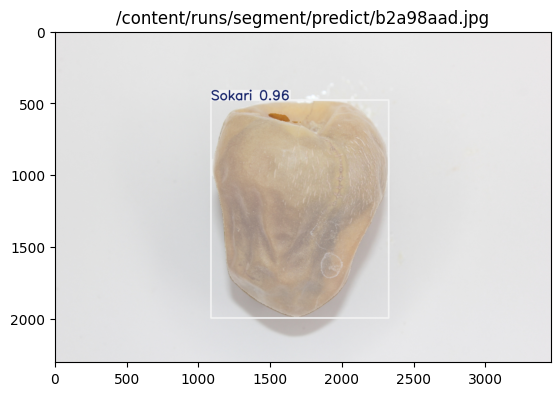

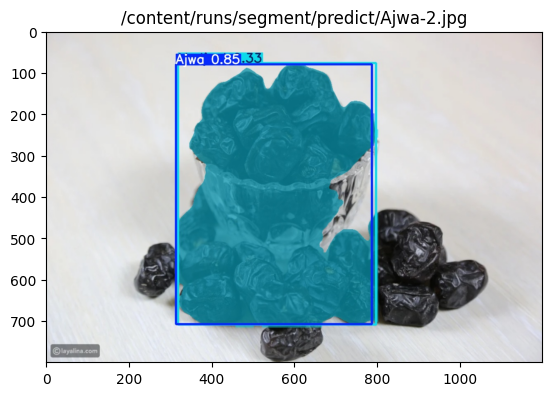

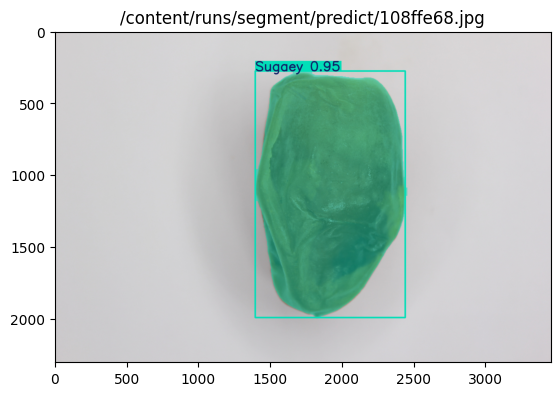

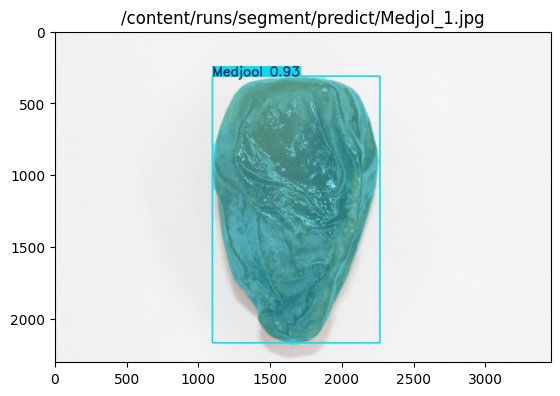

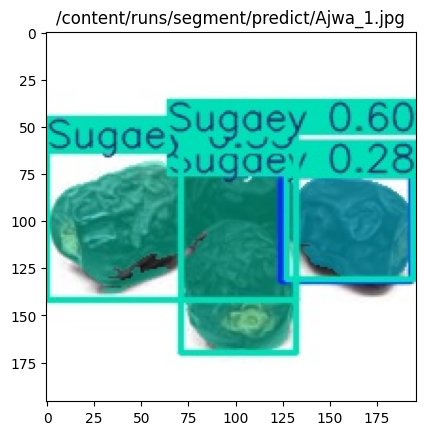

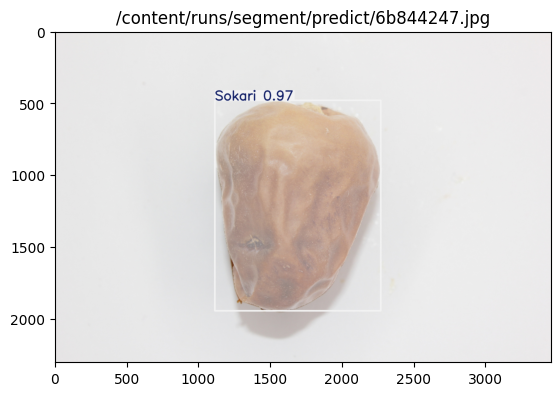

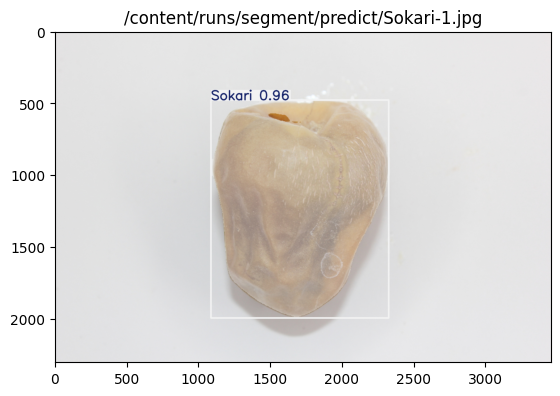

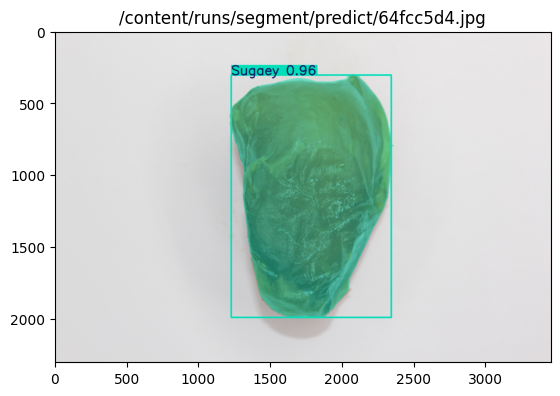

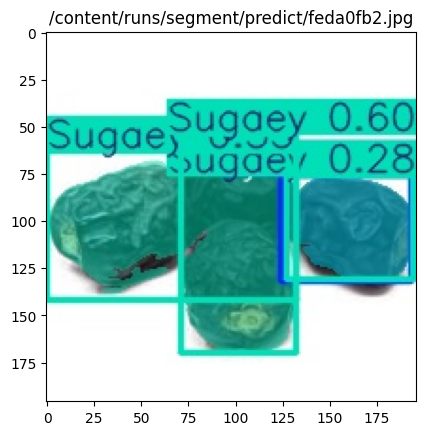

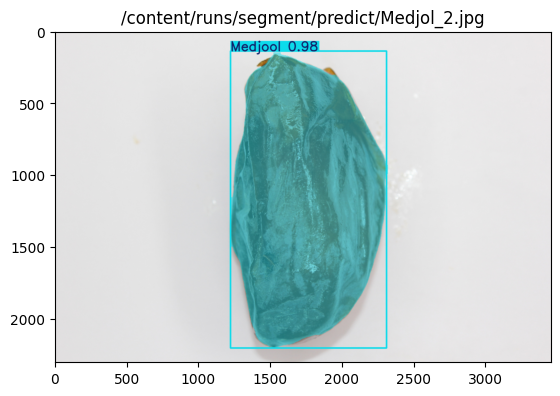

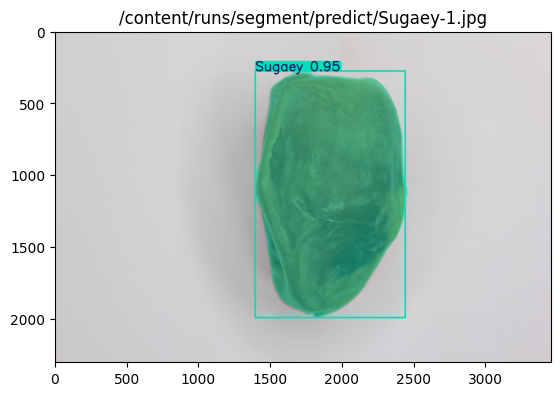

In [40]:
all_images = glob.glob('/content/runs/segment/predict/*.jpg')

for images in all_images:
  img = plt.imread(images)
  plt.imshow(img)
  plt.title(images)
  plt.show()


# Done by: Abdulrahman Almejna